In [1]:
import time
import datetime
start_time = time.time()
print(datetime.datetime.now())

2022-04-28 23:43:41.851268


In [2]:
import os
import pickle
import sys
import warnings
warnings.filterwarnings('ignore')
from glob import glob
from IPython.display import display_markdown

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import shap
# from scipy.stats import spearmanr
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
# import japanize_matplotlib
import seaborn as sns
import pickle

# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# import lightgbm as lgb
# import xgboost

# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler

# import pandas_profiling

In [3]:
# 表示用の設定を変更します
%matplotlib inline
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
pd.options.display.width = 200

In [4]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import shutil

In [5]:
INPUT_DIR = './input/'
OUTPUT_DIR = './output/'
os.makedirs(INPUT_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [6]:
browser = webdriver.Chrome(ChromeDriverManager().install())
browser.get("https://www.yahoo.co.jp/")
box = browser.find_element_by_xpath("/html/body/div/div/header/section[1]/div/form/fieldset/span/input")
box.send_keys("python")
search_button = browser.find_element_by_xpath("/html/body/div/div/header/section[1]/div/form/fieldset/span/button/span/span")
search_button.click()
browser.close()



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\tomizawa\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


In [7]:
browser = webdriver.Chrome(ChromeDriverManager().install())
browser.get("https://www.mhlw.go.jp/stf/covid-19/open-data.html")
yousei = browser.find_element_by_xpath("/html/body/div[1]/main/div[2]/div/div/div[2]/div/strong/span/a[1]")
yousei.click()



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\tomizawa\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


In [8]:
time.sleep(5)
browser.close()

In [9]:
downloaded_csv_files = sorted(glob(r"D:/Users/tomizawa/Downloads/*.csv"), key=os.path.getmtime)
downloaded_csv_files

['D:/Users/tomizawa/Downloads\\newly_confirmed_cases_daily.csv']

In [12]:
csv_file_path = downloaded_csv_files[-1]

In [11]:
shutil.move(csv_file_path, INPUT_DIR)

Error: Destination path './input/newly_confirmed_cases_daily.csv' already exists

In [13]:
df = pd.read_csv(os.path.join(INPUT_DIR, csv_file_path))

In [14]:
df

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/1/16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020/1/17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020/1/18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020/1/19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020/1/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2022/4/23,43906,2785,403,364,715,283,213,649,952,768,507,2486,1885,5387,3360,473,129,362,220,172,542,635,795,2469,489,300,900,3113,1505,266,253,130,195,649,979,218,85,371,283,158,2553,464,545,577,386,482,789,1662
829,2022/4/24,38500,2633,303,334,518,272,182,527,784,650,433,2297,1751,4936,2567,560,116,368,200,139,535,364,671,1990,447,356,841,2733,1438,262,205,113,207,631,997,176,72,317,219,111,2101,268,454,468,368,392,883,1311
830,2022/4/25,24778,1867,259,251,256,124,131,304,856,313,247,1593,1264,3141,2807,316,60,331,142,98,271,377,339,986,299,196,586,963,706,210,147,96,103,336,559,99,56,131,124,62,1543,357,284,266,215,244,374,489
831,2022/4/26,40443,2132,401,291,581,339,200,472,585,746,562,1750,1491,5048,2450,340,102,148,150,185,544,752,613,2772,341,330,627,3967,1580,90,218,151,208,546,830,231,92,354,404,205,2216,585,623,780,565,454,974,1418


In [15]:
df.iloc[df["ALL"].idxmax()]

Date         2022/2/1
ALL            103616
Hokkaido         3453
Aomori            417
Iwate             151
Miyagi            505
Akita             228
Yamagata          230
Fukushima         464
Ibaraki          1585
Tochigi           794
Gunma            1143
Saitama          6251
Chiba            5236
Tokyo           18814
Kanagawa         8326
Niigata           547
Toyama            228
Ishikawa          592
Fukui             151
Yamanashi         353
Nagano            601
Gifu             1118
Shizuoka         1983
Aichi            7779
Mie               993
Shiga            1086
Kyoto            2895
Osaka           16203
Hyogo            6378
Nara             1408
Wakayama          620
Tottori           122
Shimane            84
Okayama          1244
Hiroshima        1239
Yamaguchi         335
Tokushima         162
Kagawa            345
Ehime             326
Kochi             334
Fukuoka          4504
Saga              584
Nagasaki          614
Kumamoto          936
Oita      

<BarContainer object of 833 artists>

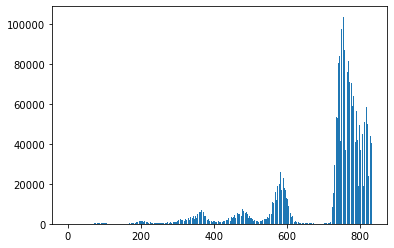

In [19]:
plt.bar(df.index, df["ALL"])

<BarContainer object of 833 artists>

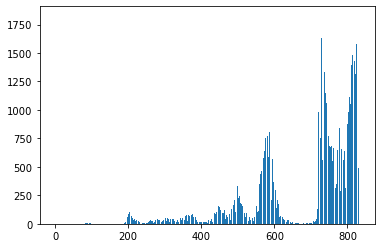

In [17]:
plt.bar(df.index, df["Okinawa"])